# Shifting then Tilting HG(0,0)

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, cmath as cm, mpmath as mp
from scipy import integrate

In [2]:
#constants
pi = np.pi

#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-5e-3,5e-3,1000,-5e-3,5e-3,1000)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)
a = 1e-3 #shift

lam = params.wavelength #wavelength
w0 = params.w0 #spot size
k = params.k #wavenumber
z0 = params.z0 #waist location
Zr = params.Zr #rayleigh range


For gap half-width $b$, the right side PD:

\begin{align*}
		C_{nmn'm'}^{R} =&
		\int_{b}^{\infty} dx\int_{-\infty}^{\infty}  dy \;
		\frac{2}{\pi}
		\frac{1}{w_0 w(z)}
        \frac{1}{\sqrt{1 + \big( \frac{z-(x+a)\alpha-z_0}{z_R} \big)^2}}
		\\& \; \times
		\exp \Big(
		\frac
		{
		-ik( (x+a)^{2}+y^{2})
		}
		{2 R_c(z) - (x+a) \alpha }-
		\frac{(x+a) +y^{2}}
		{
		w_0^2
        (1 + \big( \frac{z-(x+a)\alpha -z_0}{z_R} \big)^2)}
		\Big)
		\\& \; \times
		\exp \Big(\frac{ik(x^{2}+y^{2})}{2R_{c}(z)}-
		\frac{x^{2}+y^{2}}{w(z)^{2}} \Big)
\end{align*}

In [3]:
def integ_gaps(alpha_lin,gapsize,z):
    
    sol = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):

        f = lambda y, x: ( 
            (2/pi)* 
            1/(w0*pl.w(z,params))* 
            1/(np.sqrt((1 + (x+a)*alpha_lin[i])/(Zr)**2))
            * mp.exp(
            (1j)*k*(x**2+y**2)/(2*pl.radius_curvature(z,params) )-
            (x**2+y**2)/(pl.w(z,params)**(2)) 
            )    
        )
        
        #with gap 1/1000 plane width
        cr = mp.quadgl(f, [plane.ymin,plane.ymax],[plane.xmax*gapsize,plane.xmax])
        cl = mp.quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,plane.xmin*gapsize])
        
        print(cr,cl)
        
        #args for phi_r and phi_l
        phi_r = cm.phase(cr)
        phi_l = cm.phase(cl)
        
        #result in cycles
        sol[i] = 0.5*(phi_r-phi_l)/(2*pi)
    
    print(sol[0],sol[1])
    return (sol) 

(2.89469709045764 + 0.491595975268033j) (2.89469627806475 + 0.491595766420413j)
(2.8946959605868 + 0.491595747945193j) (2.8946959605868 + 0.491595747945193j)
(2.89469483071738 + 0.491595520622695j) (2.89469564310905 + 0.491595729470002j)
1.893973942974731e-09 0.0


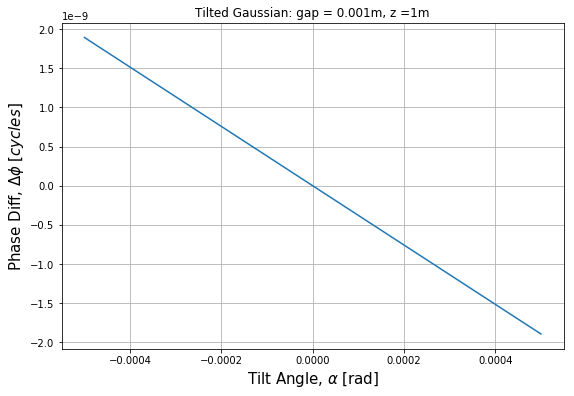

In [4]:
gapsize = 1e-3 # gap full-width [m]
z = 1 # optical axis location [m]

alpha_lin = np.linspace(-500e-6,500e-6,3)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ_gaps(alpha_lin,gapsize,z=500e-3))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=15) 
plt.title(r'Tilted Gaussian: gap = ' + str(gapsize) + 'm, z =' + str(z) + 'm') 

plt.grid()